# Run Opportunities Created-  A new baseball statistic
***
This is a Sabermetrics final project by Meredith Burgess

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

Loading data 

In [34]:
listOfEvents = ["Out", "K", "SB", "DI", "CS", "PK", "WP", "PB", "BK", "OA", "FE", "NIBB", "IBB", "HBP", "XI",
"ROE", "FC", "1B", "2B", "3B", "HR" ]
listOfEventsLong = ["Generic Out", "Strikeout", "Stolen Base", "Defensive Indifference", "Caught Stealing", "Pickoff", "Wild Pitch", "Passed Ball",
"Balk", "Other Advance", "Foul Error", "Nonintentional Walk", "Intentional Walk", "Hit By Pitch", "Interference", "Error", "Fielder Choice",
"Single", "Double", "Triple", "Homerun"]
eventCodes = [2, 3, 4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]
eventCodesDict = {"Out":2, "K":3, "SB":4, "DI":5, "CS":6, "PK":8, "WP":9, "PB":10, "BK":11, "OA":12, 
"FE":13, "NIBB":14, "IBB":15, "HBP":16, "XI":17,"ROE":18, "FC":19, "1B":20, "2B":21, "3B":22, "HR":23}

local_path = 'C:\Users\meri_\Documents\CU\Sabermetrics\\finalProject\\3gramofevents.csv'
file_path = local_path

eventsDF = pd.read_csv(file_path)

local_path = 'C:\Users\meri_\Documents\CU\Sabermetrics\\finalProject\\3gramCombinedScores.csv'
file_path = local_path

scoresDF = pd.read_csv(file_path)

eventsDF.head()


,event_cd,eventCD2,eventCD3,runsCt3
0,14,2,20,1
1,2,20,20,1
2,3,2,23,2
3,4,2,2,1
4,2,14,20,1


-Event frequences in our n-gram 

-Transition matrix between events

-Sequence frequencies 

{'3B': 2801, 'HBP': 2067, '2B': 21364, 'DI': 308, 'FC': 1099, 'K': 10273, 'WP': 2964, 'ROE': 3157, 'OA': 33, 'BK': 328, 'PB': 622, 'HR': 10835, 'XI': 26, 'FE': 28, '1B': 50169, 'PK': 435, 'CS': 158, 'SB': 3735, 'NIBB': 16846, 'IBB': 1917, 'Out': 36189}


ValueError: invalid literal for float(): 3B

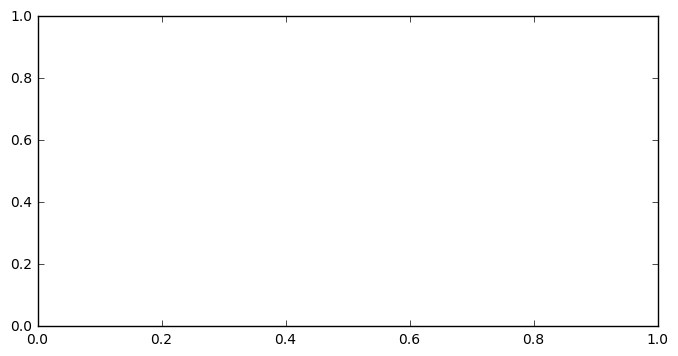

In [38]:
eventsDF['event_cd']

eventFreq = {}
for v in eventCodes:
    eventFreq[v] = 0
    
for v in eventsDF['event_cd']:
    eventFreq[v] = eventFreq[v] + 1
for v in eventsDF['eventCD2']:
    eventFreq[v] = eventFreq[v] + 1
for v in eventsDF['eventCD3']:
    eventFreq[v] = eventFreq[v] + 1
    
eventNameFreq = {}
for n in listOfEvents:
    k = eventCodesDict[n]
    eventNameFreq[n] = eventFreq[k]
    
   
#print eventFreq
#print listOfEvents
print eventNameFreq

fig, ax = plt.subplots(figsize=(8,4))
ax.bar(list(eventNameFreq.keys()), list(eventNameFreq.values()))